# Base de __Crédito__

In [ ]:
# Importação das bibliotecas.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot')

### Exploração dos dados
Dicionário das variáveis:

- __person_age__: Age
- __person_income__: Annual Income
- __person_home_ownership__: Home ownership
- __person_emp_length__: Employment length (in years)
- __loan_intent__: Loan intent
- __loan_grade__: Loan grade
- __loan_amnt__: Loan amount
- __loan_int_rate__: Interest rate
- __loan_status__: Loan status (0 is non default 1 is default)
- __loan_percent_income__: Percent income
- __cb_person_default_on_file__: Historical default
- __cb_preson_cred_hist_length__: Credit history length

In [ ]:
# importação dos dados
df_credit = pd.read_csv("/content/credit_risk_dataset.csv")

In [ ]:
# Visualizar as primeiras linhas
df_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# Verificar algumas informações das variáveis do dataset
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# Estatísticas descritivas das variáveis numéricas
df_credit.describe().round(3)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000,32581.000,31686.000,32581.000,29465.000,32581.000,32581.000,32581.000
mean,27.735,66074.848,4.790,9589.371,11.012,0.218,0.170,5.804
std,6.348,61983.119,4.143,6322.087,3.240,0.413,0.107,4.055
min,20.000,4000.000,0.000,500.000,5.420,0.000,0.000,2.000
25%,23.000,38500.000,2.000,5000.000,7.900,0.000,0.090,3.000
50%,26.000,55000.000,4.000,8000.000,10.990,0.000,0.150,4.000
75%,30.000,79200.000,7.000,12200.000,13.470,0.000,0.230,8.000
max,144.000,6000000.000,123.000,35000.000,23.220,1.000,0.830,30.000


In [ ]:
# Retornar a pessoa com maior salario
df_credit[df_credit['person_income'] >= 6000000.000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


In [ ]:
# Retornar a pessoa com o menor salário
df_credit[df_credit['person_income'] <= 4000.000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
31930,41,4000,RENT,0.0,MEDICAL,C,2000,13.22,1,0.5,Y,15


In [ ]:
# Retornar o cliente com a maior DIVIDA
df_credit[df_credit['loan_amnt'] >= 35000.000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32158,37,85000,RENT,5.0,DEBTCONSOLIDATION,A,35000,8.90,1,0.41,N,17
32299,65,76000,RENT,3.0,EDUCATION,B,35000,10.99,1,0.46,N,27
32301,53,85000,RENT,19.0,PERSONAL,D,35000,15.65,1,0.41,N,19
32302,58,108350,RENT,5.0,PERSONAL,D,35000,14.91,1,0.32,N,19


In [ ]:
# Retornar o cliente com a menor DIVIDA
df_credit[df_credit['loan_amnt'] <= 500.000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
871,26,19500,RENT,0.0,MEDICAL,C,500,11.41,0,0.03,N,2
1355,22,26000,MORTGAGE,3.0,PERSONAL,B,500,10.46,0,0.02,N,4
8607,26,59000,MORTGAGE,7.0,HOMEIMPROVEMENT,B,500,9.76,0,0.01,N,2
15951,26,7904,MORTGAGE,0.0,HOMEIMPROVEMENT,B,500,10.71,0,0.06,N,3
18502,33,18000,RENT,0.0,DEBTCONSOLIDATION,A,500,NaN,0,0.03,N,6


### Visualização dos dados

In [ ]:
# vamos fazer a contagem de quantos dados existem em cada variável
np.unique(df_credit['loan_status'], return_counts=True)

(array([0, 1]), array([25473,  7108]))

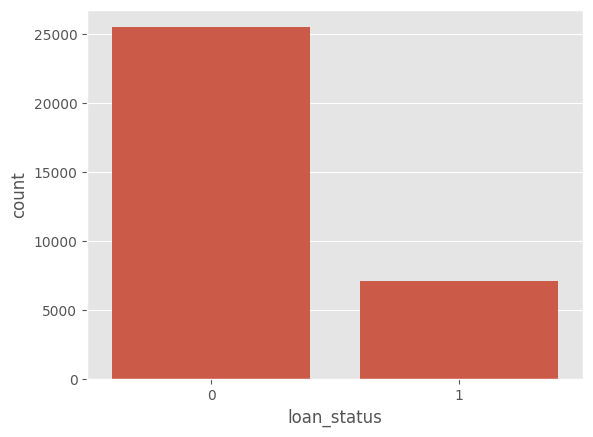

In [ ]:
# Grafico de barras para a variavel "loan_status"
sns.countplot(x=df_credit['loan_status']);

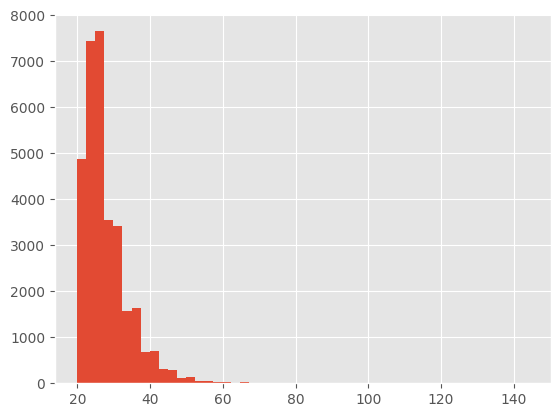

In [ ]:
# Histograma para a variavel "person_age"
plt.hist(x=df_credit['person_age'], bins=50);

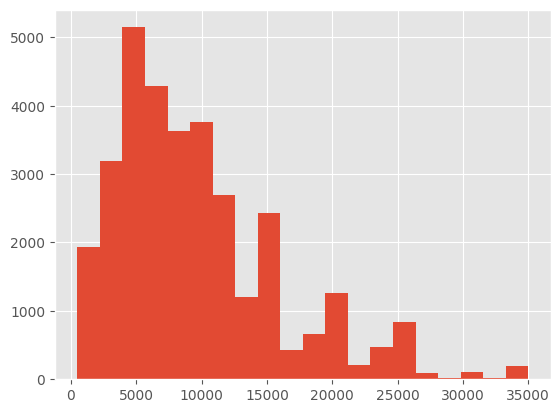

In [ ]:
# Histograma para a variavel "loan_amnt"
plt.hist(x=df_credit['loan_amnt'], bins=20);

In [ ]:
# Gráfico dinâmico
grafico = px.scatter_matrix(df_credit, dimensions=['person_age', 'person_income', 'loan_amnt'], color="loan_status")
grafico.show()

### Corrigindo valores inconsistentes
Primeiro vamos analisar os dados que possuímos, seus formatos, a ausência ou não de dados, e verificar a necessidade de corrigi-los.

In [ ]:
# Informações sobre as variáveis
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# Existe uma pessoa no dataset que possui 144 anos. Vamos verificar quais pessoas possuem uma idade maior que 115 anos.
df_credit.loc[df_credit['person_age'] >= 115]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [ ]:
# Outra forma de fazer isso é:
df_credit[df_credit['person_age'] >= 115]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [ ]:
# A titulo de teste e prática, irei remover os dados dessas pessoas que possuem idade igual ou superior a 115.
df_credit = df_credit.drop(df_credit[df_credit['person_age'] >= 115].index)

In [ ]:
# Outra forma de lidar com esses dados seria através de algum tipo de preenchimento adicional.

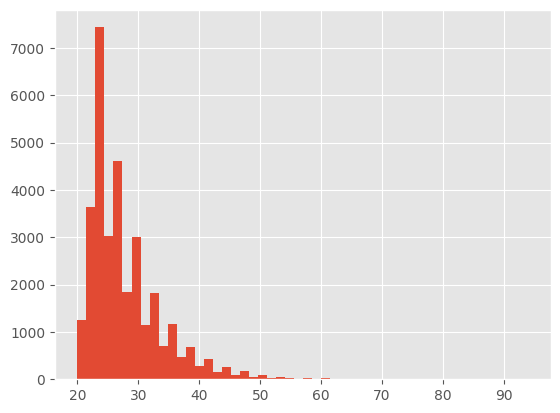

In [ ]:
# Vamos plotar novamente os gráficos.

# Histograma para a variavel "person_age"
plt.hist(x=df_credit['person_age'], bins=50);

In [ ]:
# Gráfico dinâmico
grafico = px.scatter_matrix(df_credit, dimensions=['person_age', 'person_income', 'loan_amnt'], color="loan_status")
grafico.show()

### Tratando valores faltantes
Vamos lidar agora com um problema muito comum e sério, os **dados faltantes**.

In [ ]:
# Vamos verificar a quantidade de valores nulos para cada coluna
df_credit.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3115
loan_status,0
loan_percent_income,0


Temos algumas váriaveis com valores nulos: person_emp_length, loan_int_rate.

In [ ]:
# Vamos visualizar quais são esses dados
df_credit.loc[pd.isnull(df_credit['person_emp_length'])]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [ ]:
df_credit.loc[pd.isnull(df_credit['loan_int_rate'])]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


Perceba que o tipo de dado presente na variável é **NaN**.

In [ ]:
# Vamos verificar novamente as estatisticas descritivas do dataset por um momento.
df_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32576.000000,3.257600e+04,31681.000000,32576.000000,29461.000000,32576.000000,32576.000000,32576.000000
mean,27.718044,6.588214e+04,4.789527,9589.117755,11.011547,0.218197,0.170212,5.803966
std,6.204990,5.253499e+04,4.142706,6321.886846,3.240623,0.413029,0.106778,4.053791
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Para a variável person_emp_length vamos preenchir os valores ausentes com a __mediana__. Já para a variável loan_int_rate vamos utilizar a __média__.

In [ ]:
# Substituindo os valores nulos pela mediana
df_credit['person_emp_length'].fillna(df_credit['person_emp_length'].median(), inplace=True)

In [ ]:
# Substituindo os valores nulos pela média
df_credit['loan_int_rate'].fillna(df_credit['loan_int_rate'].median(), inplace=True)

In [ ]:
# Verificando se deu certo
df_credit.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


Perceba que não constam mais valores nulos nas colunas, ou seja, o preenchimento funcionou.

## Divisão entre previsores e classe

In [ ]:
 # Remove a variável target e categóricas e converte para o formato de array NumPy
X_credit = df_credit.drop(['loan_status', 'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], axis=1).values

In [ ]:
y_credit = df_credit['loan_status'].values # Define a variável target

## Escalonamento de atributos

In [ ]:
# Verificar a menor renda
X_credit[:, 1].min()

4000.0

In [ ]:
# Verificar a maior renda
X_credit[:, 1].max()

2039784.0

In [ ]:
# Verificar a menor idade
X_credit[:, 0].min()

20.0

In [ ]:
# Verificar a maior idade
X_credit[:, 0].max()

94.0

Temos uma diferença bem grande entre a quantidade minima e máxima recebida, assim como a idade minima e máxima.

É importante notar também que há uma diferença muito grande na escala de valores entre renda e idade.

In [ ]:
# Verificar a menor divida
X_credit[:, 6].min()

2.0

In [ ]:
# Verificar a maior divida
X_credit[:, 6].max()

30.0

Também existe uma grande disparidade entre os valores.

O motivo de isso ser um problema é devido ao fato de que alguns algoritmos trabalham utilizando cálculos de distância, e essa disparidade faz com que exista uma distância muito grande entre os valores.

### Aplicação da Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

Vamos verificar o resultador dessa padronização.

In [ ]:
# Verificar a menor renda
X_credit[:, 1].min()

-1.1779405316576799

In [ ]:
# Verificar a maior renda
X_credit[:, 1].max()

37.573667575291424

In [ ]:
# Verificar a menor idade
X_credit[:, 0].min()

-1.2438638905517996

In [ ]:
# Verificar a maior idade
X_credit[:, 0].max()

10.682205511601307

In [ ]:
# Verificar a menor divida
X_credit[:, 6].min()

-0.9383869857092254

In [ ]:
# Verificar a maior divida
X_credit[:, 6].max()

5.968834277553451

# Base de __Censo__

In [ ]:
df_census = pd.read_csv('/content/census.csv')

## Exploração dos dados

In [ ]:
df_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df_census.describe().round(4)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.0000,3.256100e+04,32561.0000,32561.0000,32561.0000,32561.0000
mean,38.5816,1.897784e+05,10.0807,1077.6488,87.3038,40.4375
std,13.6404,1.055500e+05,2.5727,7385.2921,402.9602,12.3474
min,17.0000,1.228500e+04,1.0000,0.0000,0.0000,1.0000
25%,28.0000,1.178270e+05,9.0000,0.0000,0.0000,40.0000
50%,37.0000,1.783560e+05,10.0000,0.0000,0.0000,40.0000
75%,48.0000,2.370510e+05,12.0000,0.0000,0.0000,45.0000
max,90.0000,1.484705e+06,16.0000,99999.0000,4356.0000,99.0000


In [ ]:
# Verificar a presença de dados faltantes
df_census.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


## Visualizando os dados

In [ ]:
# Contagem de registros na variavel income
np.unique(df_census['income'], return_counts=True)

(array(['<=50K', '>50K'], dtype=object), array([24720,  7841]))

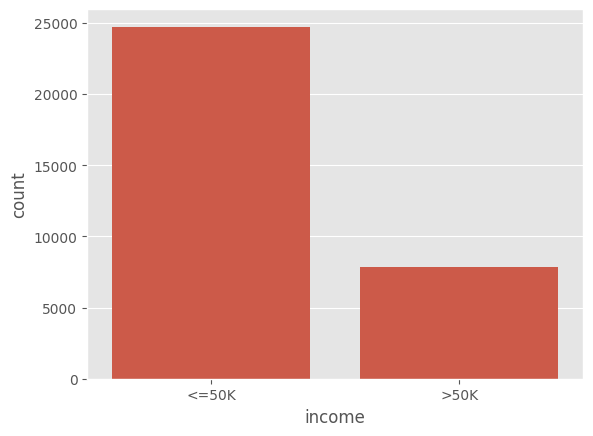

In [ ]:
# Visualizando a quantidade de pessoas com os respectivos salários.
sns.countplot(x=df_census['income']);

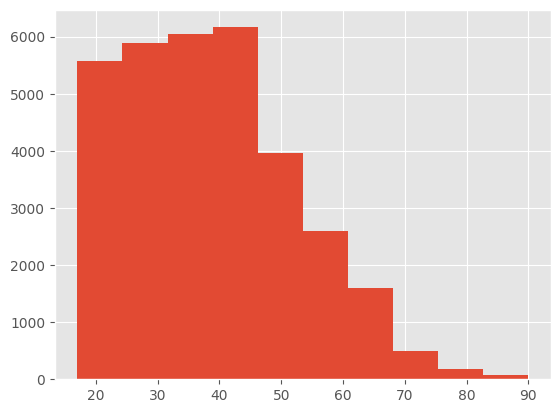

In [ ]:
# Histograma para visualizar a distribuição dos dados
plt.hist(x=df_census['age']);

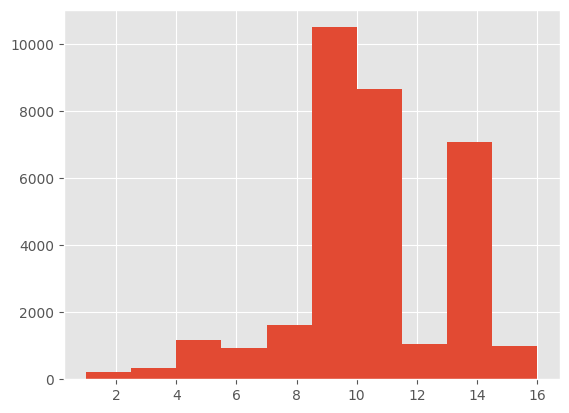

In [ ]:
# Histograma para a variavel education-num
plt.hist(x=df_census['education.num']);

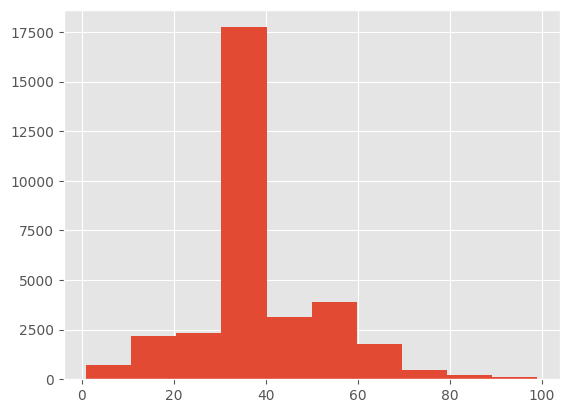

In [ ]:
# Histograma para a variavel hours.per.week
plt.hist(x=df_census['hours.per.week']);

#### Gráficos dinâmicos com plotly

In [ ]:
# Gráfico treemap
grafico = px.treemap(df_census, path=['workclass', 'occupation', 'relationship'])
grafico.show();

In [ ]:
# Gráfico de categorias paralelas - mostra a ligação entre as variáveis
grafico = px.parallel_categories(df_census, dimensions=['workclass', 'occupation'])
grafico.show();

## Divisão entre treino e teste

In [ ]:
X_census = df_census.iloc[:, 0:14].values
y_census = df_census.iloc[:, -1].values

In [ ]:
X_census[0]

array([90, '?', 77053, 'HS-grad', 9, 'Widowed', '?', 'Not-in-family',
       'White', 'Female', 0, 4356, 40, 'United-States'], dtype=object)

In [ ]:
y_census[0]

'<=50K'

### Tratamento das variáveis categóricas

#### Label Encoder
Como os algoritmos utilizam cálculos numéricos, precisamos de uma forma de transformar essas variáveis que contém strings, em variáveis numéricas.

O Label Encoder irá mapear essas variáveis categóricas e atribuir valores numéricos a elas.

In [ ]:
# Importação
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:, 1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:, 3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:, 5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:, 6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:, 7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:, 8])
X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:, 9])
X_census[:, 13] = label_encoder_country.fit_transform(X_census[:, 13])

In [ ]:
X_census

array([[90, 0, 77053, ..., 4356, 40, 39],
       [82, 4, 132870, ..., 4356, 18, 39],
       [66, 0, 186061, ..., 4356, 40, 39],
       ...,
       [40, 4, 154374, ..., 0, 40, 39],
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39]], dtype=object)

#### OneHotEncoder
Um dos problemas de usar o Label Encoder é que podemos ter muitas categorias e valores diferentes. Por exemplo, um atributo pode receber o valor 1, e outro receber o valor 15. Quando o algoritmo for trabalhar com esses valores, pode gerar uma maior importância ou peso para o atributo com valor 15, mesmo que esse não seja necessariamente o caso.

Por exemplo, se possuímos uma variável "Carro" que possui os carros: Gol, Palio, Uno. Ao aplicar o Label Encoder, ele poderia atribuir 1 para o Gol, 2 para o Palio, 3 para o Uno. Isso poderia levar o modelo a dar mais peso para o Uno, por ter sido atribuído um maior valor.

Para contornar esse problema, podemos aplicar o __OneHotEncoder__. No exemplo que mencionamos acima, seriam criadas uma coluna nova para cada OHE onde seria atribuído o valor 1 ao atributo que corresponder a regra.

In [ ]:
# Exemplo
len(np.unique(df_census['workclass']))

9

Perceba que temos 9 classes de trabalho, ou seja, seria, criadas 9 novas colunas ao realizar o OHE.

In [ ]:
# Importação
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Aplicará o OHE sem remover os outros atributos. Passamos a string "OneHot" para informar o método utilizado, passamos a classe do OHE, e em seguida passamos as colunas que queremos que o OHE seja aplicado.
ohe_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [ ]:
X_census = ohe_census.fit_transform(X_census).toarray()

In [ ]:
X_census.shape

(32561, 108)

### Escalonamento de valores

In [ ]:
# Aplicação da Padronização
from sklearn.preprocessing import StandardScaler

scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census[0]

array([ 4.09081281e+00, -1.74295110e-01, -2.62097357e-01, -1.46638105e-02,
       -1.51679230e+00, -1.88389328e-01, -2.90935682e-01, -2.03761449e-01,
       -2.07399897e-02, -1.71753247e-01, -1.93486624e-01, -1.16091949e-01,
       -7.20160099e-02, -1.01649545e-01, -1.42271803e-01, -1.26644948e-01,
       -1.84063764e-01, -2.10534334e-01, -4.43657054e-01, -1.13343872e-01,
        1.44939722e+00, -2.36373909e-01, -3.96074245e-02, -1.34195534e-01,
       -5.37144246e-01, -3.97508064e-01, -2.65869483e-02, -9.22840678e-01,
       -1.14036778e-01, -6.98783763e-01, -1.80284599e-01,  5.63830948e+00,
        4.08257151e+00, -3.61861434e-01, -1.66277090e-02, -3.79495169e-01,
       -3.77745550e-01, -1.77450218e-01, -2.09577972e-01, -2.55954322e-01,
       -3.35541333e-01, -6.78016432e-02, -3.81663381e-01, -1.42608475e-01,
       -3.55316091e-01, -1.71278873e-01, -2.27103553e-01, -8.25333347e-01,
        1.70899099e+00, -1.76249722e-01, -4.29345818e-01, -3.44032316e-01,
       -2.24926808e-01, -

## Divisão entre Treino e Teste

In [ ]:
# Importação
from sklearn.model_selection import train_test_split

In [ ]:
# Divisão para a base de crédito
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(X_credit, y_credit, test_size=.25, random_state=42)

In [ ]:
# Divisão para a base do census
X_census_train, X_census_test, y_census_train, y_census_test = train_test_split(X_census, y_census, test_size=.25, random_state=42)

In [ ]:
# Separação CREDITO
X_credit_train.shape

(24432, 7)

In [ ]:
y_credit_train.shape

(24432,)

In [ ]:
X_credit_test.shape, y_credit_test.shape

((8144, 7), (8144,))

In [ ]:
# Separação CENSUS
X_census_train.shape, y_census_train.shape

((24420, 108), (24420,))

In [ ]:
X_census_test.shape, y_census_test.shape

((8141, 108), (8141,))

## Salvar as bases de dados

In [ ]:
# Importação
import pickle

In [ ]:
with open('credit_processed.pkl', mode='wb') as f:
  pickle.dump([X_credit_train, y_credit_train, X_credit_test, y_credit_test], f)

In [ ]:
with open('census_processed.pkl', mode='wb') as f:
  pickle.dump([X_census_train, y_census_train, X_census_test, y_census_test], f)